**K-Means - Examine performance in the ideal case**

This is achieved by the following steps:
* Generate sample dataset using *make_blobs* with the properties below:
 * Clusters are well-separated 
 * Clusters have similar number of points
 * Clusters have similar variance
 * Clusters have isotropic/spherical variance
* Run KMeans on this dataset
* Examine various metrics to evaluate 'goodness' of clustering


In [2]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
print 'sklearn.version = ', sklearn.__version__

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics


/Users/vissan1/GitHub/ml/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


 sklearn.version =  0.18
numpy.version =  1.11.2
pandas.version =  0.19.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


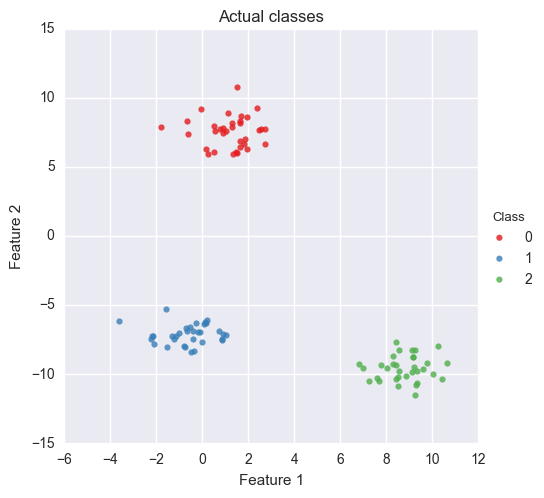

In [3]:
# ----------
# Generate sample dataset for clustering
# ----------

X, actual_classes = make_blobs(n_samples=100, n_features=2, centers=3, random_state=13112016)
df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': actual_classes
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', palette='Set1', fit_reg=False)
plt.title('Actual classes');


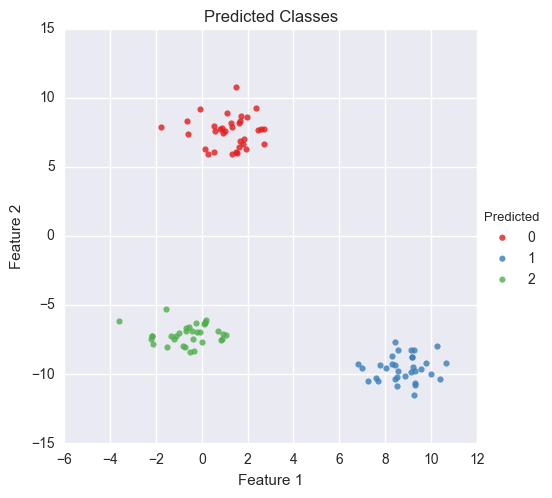

In [4]:
# ----------
# Cluster data using KMeans
# ----------

kmeans_est = KMeans(n_clusters=3).fit(X)
predicted_classes = kmeans_est.labels_

df_predicted = pd.DataFrame({
        'Feature 1':df['Feature 1'], 
        'Feature 2':df['Feature 2'], 
        'Predicted':predicted_classes
    })

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df_predicted, hue='Predicted', palette='Set1', fit_reg=False)
plt.title('Predicted Classes');


In [27]:
# ----------
# Evaluate accuracy of KMeans clustering using various metrics
# ----------

print 'Truth is known: \n----------'

# Adjusted Rand Index
print 'Adjusted Rand Index = {} \n'.format(round(metrics.adjusted_rand_score(actual_classes, predicted_classes),3))

# Mutual Information scores
print 'Mutual Information score = ', round(metrics.mutual_info_score(actual_classes, predicted_classes),3)
print 'Adjusted Mutual Information score = ', round(metrics.adjusted_mutual_info_score(actual_classes, predicted_classes),3)
print 'Normalized Mutual Information score = {} \n'.format(round(metrics.normalized_mutual_info_score(actual_classes, predicted_classes),3))

# Homogeneity score, Completeness scores & V measure
print 'Homogeneity score = ', round(metrics.homogeneity_score(actual_classes, predicted_classes),3)
print 'Completeness score = ', round(metrics.completeness_score(actual_classes, predicted_classes),3)
print 'V-Measure = ', round(metrics.v_measure_score(actual_classes, predicted_classes),3)
print '(H, C, V) = {} \n'.format(np.around(metrics.homogeneity_completeness_v_measure(actual_classes, predicted_classes), decimals=2))

# Fowlkes-Mallows score
print 'Fowlkes-Mallows score = {} \n'.format(round(metrics.fowlkes_mallows_score(actual_classes, predicted_classes),3))


print 'Truth is not known: \n----------'

print 'Inertia = ', round(kmeans_est.inertia_,3)

# Sihouette Score
print 'Silhouette score = ', round(metrics.silhouette_score(X, predicted_classes),3)

# Calinski-Harabaz Index
print 'Calinski-Harabaz score = ', round(metrics.calinski_harabaz_score(X, predicted_classes),3)

Truth is known: 
----------
Adjusted Rand Index = 1.0 

Mutual Information score =  1.099
Adjusted Mutual Information score =  1.0
Normalized Mutual Information score = 1.0 

Homogeneity score =  1.0
Completeness score =  1.0
V-Measure =  1.0
(H, C, V) = [ 1.  1.  1.] 

Fowlkes-Mallows score = 1.0 

Truth is not known: 
----------
Inertia =  182.097
Silhouette score =  0.847
Calinski-Harabaz score =  1976.436
